In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

df = pd.read_csv(r"C:\Users\archa\Downloads\gold_price\Yearly_Avg.csv")

df.head()

In [64]:
#keep only required columns

df = df[['Date', 'INR']]
df.head()

,Date,INR
0,12/29/1978,NaN
1,12/31/1979,"2,481.9"
2,12/31/1980,"4,831.7"
3,12/31/1981,"3,966.6"
4,12/31/1982,"3,553.6"


In [68]:
#clean the inr column
#remove commas and spaces defor converting 
df['INR']=df['INR'].astype(str)
df['INR']=df['INR'].str.replace(',','',regex=True)
df['INR']=pd.to_numeric(df['INR'], errors='coerce')
df.head()

,Date,INR
0,12/29/1978,NaN
1,12/31/1979,2481.9
2,12/31/1980,4831.7
3,12/31/1981,3966.6
4,12/31/1982,3553.6


In [ ]:
#conver Date-> year
df['Year']=pd.to_datetime(df['Date'],errors='coerce').dt.year
df=df[['Year','INR']]
df.head()

In [72]:
#rename for clarity
df.rename(columns={'INR':'Gold_Price'}, inplace=True)
df.head()

,Year,Gold_Price
0,1978,NaN
1,1979,2481.9
2,1980,4831.7
3,1981,3966.6
4,1982,3553.6


In [74]:
#check clean data
print(df.head())
print(df.info())
print(df.shape)

   Year  Gold_Price
0  1978         NaN
1  1979      2481.9
2  1980      4831.7
3  1981      3966.6
4  1982      3553.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        45 non-null     int32  
 1   Gold_Price  44 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 672.0 bytes
None
(45, 2)


In [78]:
print(df.dtypes)

Year            int32
Gold_Price    float64
dtype: object


In [80]:
#covert Gold_Price to numeric
df['Gold_Price']=pd.to_numeric(df['Gold_Price'],errors='coerce')

In [82]:
#remove missing values
df.dropna(inplace=True)

In [84]:
#convert year to int 
df['Year']=df['Year'].astype(int)

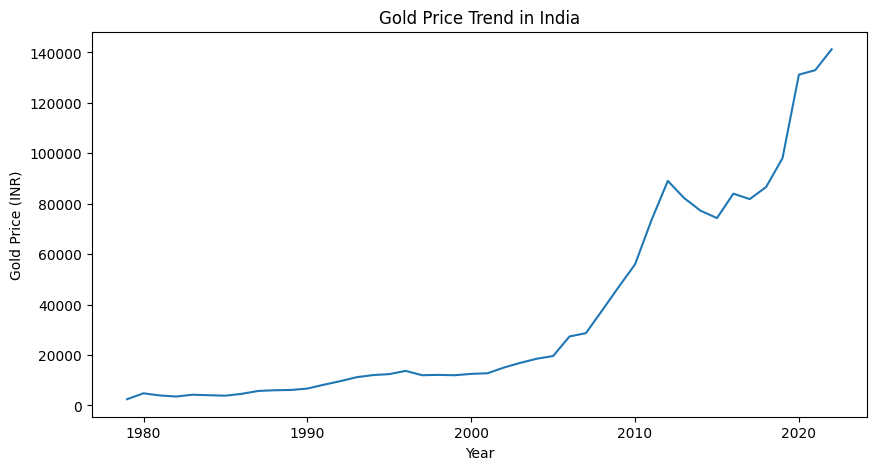

In [86]:
#Visualize gold price trend
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Gold_Price'])
plt.xlabel("Year")
plt.ylabel("Gold Price (INR)")
plt.title("Gold Price Trend in India")
plt.show()

In [88]:
x=df[['Year']]
y=df[['Gold_Price']]


In [90]:
#model 1->Linear Regression
#training model
lr=LinearRegression()
lr.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [92]:
lr_pred=lr.predict(x)

In [98]:
year_2036=pd.DataFrame({'Year':[2036]})
lr_2036=lr.predict(year_2036)
print("Linear Regression prediction for 2036",lr_2036[0])

Linear Regression prediction for 2036 [134620.37975335]


In [100]:
#Evaluate  LR
print("Lr MAR:",mean_absolute_error(y,lr_pred))
print("LR RMSE:",np.sqrt(mean_squared_error(y,lr_pred)))
print("LR R2 Score:",r2_score(y,lr_pred))

Lr MAR: 15309.865723941322
LR RMSE: 19056.795771649497
LR R2 Score: 0.7724481024708817


In [110]:
#model2:Polynomial Regression
#transform feature
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)

In [112]:
#train model
pr=LinearRegression()
pr.fit(x_poly,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [114]:
pr_pred=pr.predict(x_poly)

In [118]:
year_2036_poly=poly.transform(year_2036)
pr_2036=pr.predict(year_2036_poly)
print("Polynomial Regression prediction for 2036:", pr_2036[0])

Polynomial Regression prediction for 2036: [340084.83342171]


In [120]:
print("PR MAE:", mean_absolute_error(y, pr_pred))
print("PR RMSE:", np.sqrt(mean_squared_error(y, pr_pred)))
print("PR R2 Score:", r2_score(y, pr_pred))


PR MAE: 5244.3418611179695
PR RMSE: 7783.922965750906
PR R2 Score: 0.962035493364975


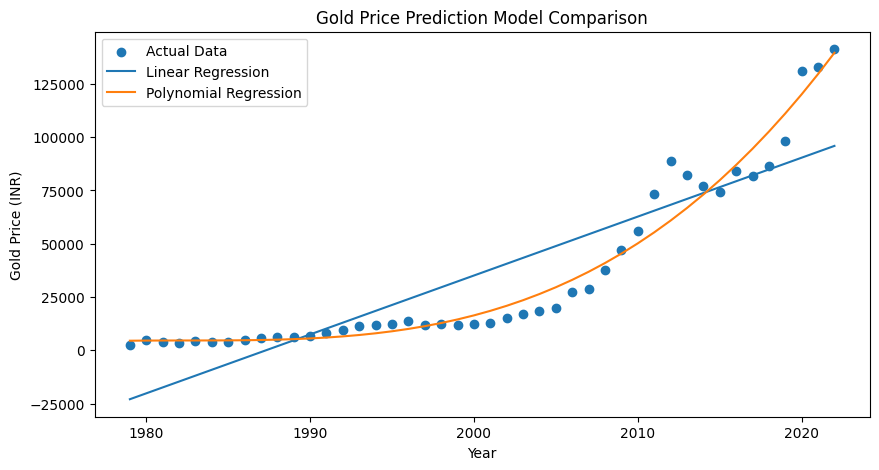

In [122]:
plt.figure(figsize=(10,5))
plt.scatter(df['Year'],y,label="Actual Data")
plt.plot(df['Year'],lr_pred,label="Linear Regression")
plt.plot(df['Year'],pr_pred,label="Polynomial Regression")
plt.xlabel("Year")
plt.ylabel("Gold Price (INR)")
plt.title("Gold Price Prediction Model Comparison")
plt.legend()
plt.show()